<a href="https://colab.research.google.com/github/Henrique-Peter/airbnb_dublin/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Dublin

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, ano em que a Startup completava 10 anos de existência, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Dublin (capital da Irlanda), e ver quais insights podem ser extraídos a partir de dados brutos.**

<img alt="Dublin" width="80%" src="https://www.eurodicas.com.br/wp-content/uploads/2020/12/morar-em-dublin.jpg">

## Obtenção dos Dados


In [36]:
# importando os pacotes necessarios

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# importando o arquivo listings.csv para um DataFrame

df = pd.read_csv('listings.csv')

## Análise dos Dados

É de extrema importância ressaltar que para esse projeto estamos utilizando um arquivo com dados resumidos, não tendo todas as variáveis analisadas pela empresa. E no momento que realizo o projeto, os dados tinham sido atualizados pela última vez em Dezembro de 2021.

Pelo mesmo link do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar o arquivo `listings.csv.gz`, que contém mais informações.

De qualquer forma, vamos entender o que cada variável do DataFrame representa, e se você desejar, pode acessar por [esse link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896) a planilha com a explicação de todas as variáveis presentes no arquivo detalhado.

**Dicionário das variáveis**

* `id` - identificação única do Airbnb para o imóvel listado
* `name` - o nome pelo qual o imóvel foi listado no site
* `host_id` - identificação única do Airbnb para o anfitrião
* `host_name` - nome do anfitrião
* `neighbourhood_group` - essa coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - indica o espaço que está sendo alugado (podendo ser todo o imóvel ou apenas um quarto dele, por exemplo)
* `price` - preço da diária na moeda local (Euro)
* `minimum_nights` - número mínimo de noites para a estadia
* `number_of_reviews` - número de classificações da propriedade no site
* `last_review` - data da última classificação
* `reviews_per_month` - média de classificações por mês
* `calculated_host_listings_count` - número de imóveis listados que o anfitrião tem na mesma região
* `availability_365` - número de dias de disponibilidade do imóvel dentro de 365 dias
* `number_of_reviews_ltm` - número de classificações que o imóvel teve nos últimos 12 meses
* `license` - essa coluna não contém nenhum valor válido
---

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [38]:
# vamos visualizar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,65,3,227,2020-03-06,1.74,3,233,0,NaN
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.29885,-6.31850,Private room,30,1,1,2019-05-11,0.03,1,99,0,NaN
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,61,3,182,2020-03-09,1.42,3,323,0,NaN
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,40,2,316,2021-12-05,2.67,3,324,5,NaN
4,162809,5.5 miles south of Dublin City :^),777681,Robert,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,288,2021-10-19,3.62,2,114,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Iniciando de fato a análise, percebemos que temos 6977 entradas (linhas) e 18 variáveis (colunas) no nosso DataFrame.

Sobre os tipos de variáveis, a maioria se trata de dados numéricos, divididos entre números inteiros e decimais, e apenas 5 variáveis classificadas como objetos.

In [39]:
# identificando o volume de dados do DataFrame

print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

# verificando os tipos das variaveis do dataset

print('-' * 50)
df.dtypes

Entradas: 6977
Variáveis: 18
--------------------------------------------------


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Dados de qualidade são a base para uma análise precisa. Sabendo disso, teremos que verificar os dados ausentes do nosso dataset, e saber qual o peso deles sobre o todo.

* Logo de cara percebemos que as variáveis `license` e `neighbourhood_group` têm 100% dos seus dados faltantes, tornando elas irrelevantes para nossa análise;
* As colunas de `reviews_per_month` e `last_review` possuem 20% de dados nulos cada, o que também é uma porcentagem considerável;
* Já as variáveis `host_name` e `name` possuem aproximadamente 0,1% de dados faltantes, não impactando muito nos resultados finais. 

In [40]:
# vamos ordenar em ordem decrescente as variaveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.207826
last_review                       0.207826
host_name                         0.001290
name                              0.000143
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para conseguir analisar melhor os nossos dados, vamos visualizar a distribuição das variáveis por meio de histogramas.

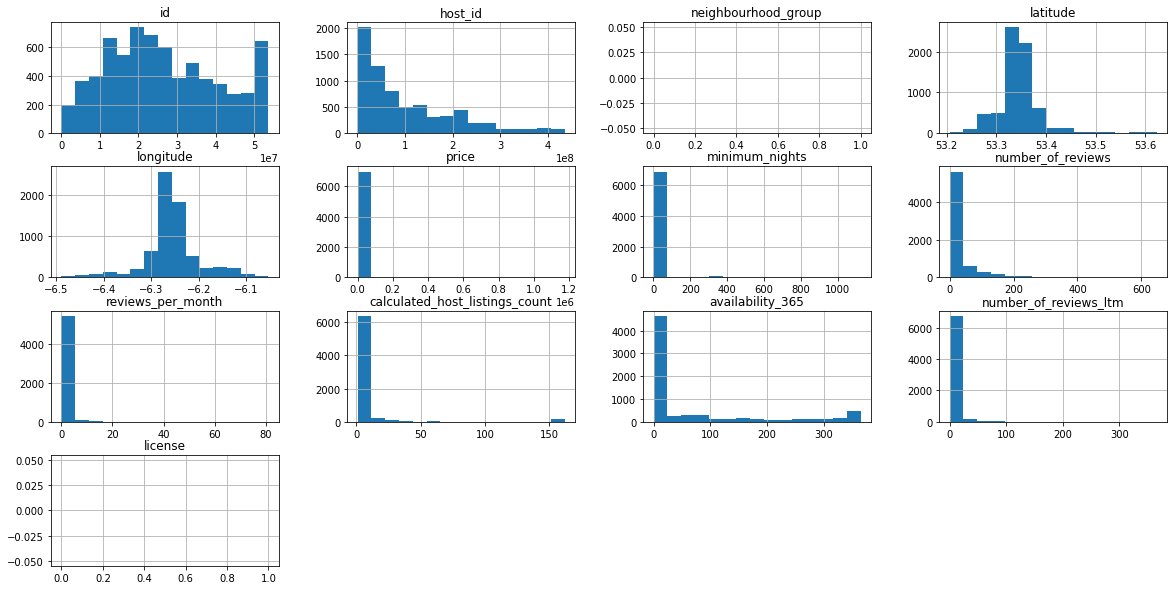

In [41]:
# plot do histograma das variáveis numéricas

df.hist(bins = 15, figsize = (20,10));

#### **Existem outliers nas variáveis analisadas?**

Olhando para os nossos histogramas, podemos ver que existem fortes indícios de outliers em algumas variáveis, como por exemplo `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365` e `number_of_reviews_ltm`.

Essas variáveis contém poucos valores que acabam distorcendo a análise, por causa da discrepância entre a média e os valores máximos.

Conseguiremos verificar melhor esses outliers de duas maneiras:
* Utilizando o método `describe()`;
* Plotando boxplots para as variáveis.

**Primeiro vamos verificar um resumo estatístico das variáveis numéricas**

In [42]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.977000e+03,6977.000000,6977.000000,5527.000000,6977.000000,6977.000000,6977.000000
mean,3.019986e+02,8.927189,30.272753,0.963123,7.251971,65.408772,2.958005
std,1.405164e+04,42.118071,59.819724,2.070010,25.062374,114.209065,11.218871
min,9.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,5.500000e+01,1.000000,1.000000,0.100000,1.000000,0.000000,0.000000
50%,8.500000e+01,2.000000,6.000000,0.390000,1.000000,0.000000,0.000000
75%,1.480000e+02,4.000000,29.000000,1.190000,3.000000,78.000000,1.000000
max,1.173721e+06,1125.000000,648.000000,81.060000,162.000000,365.000000,366.000000


Com esse resumo podemos confirmar algumas hipóteses sobre as variáveis separadas:
* `price` - o valor máximo (quase 1.2 milhão de Euros) é muito superior à média (300 Euros) e até ao terceiro quartil (148 Euros), mostrando que se esse imóvel não foi registrado com o valor errado, ele está em um nível muito superior em relação ao resto dos imóveis, distorcendo a distribuição dos valores;
* `minimum_nights` - enquanto a média de noites mínimas de estadia está em torno de 9, apresentando uma mediana de 2 noites, além de mostrar que 75% dos valores estão abaixo de 4, temos um valor máximo de 1125 noites. Tendo um bom senso, sabemos que esse número está errado, visto que ninguém exigiria uma reserva mínima de 1125 noites, não é mesmo?
* `reviews` - as 3 variáveis que lidam com as classificações das propriedades apresentam valores máximos muito acima da média. Isso não quer dizer que um imóvel não possa ter muitas classificações, mas é no mínimo estranho ter mais de 80 classificações em um único mês, por exemplo, visto que pela média, algumas pessoas nem classificam as propriedades em que ficam;
* `calculated_host_listings_count` - novamente, não podemos afirmar com toda a certeza que um proprietário não tenha mais que 160 imóveis naquela região (pois poderia ser alguém com um patrimônio muito relevante ou até mesmo uma empresa que possui várias propriedades que estão disponíveis para locação no site), mas considerando que a mediana é de 1 imóvel, e que 75% dos valores da coluna estão abaixo de 3, precisamos considerar que esse valor está distorcendo os resultados, e até subindo muito a média final registrada;
* `availability_365` - no caso dessa variável, fica muito claro o que ocorre com os dados, visto que Dublin é um destino muito procurado por turistas todos os anos, e que a mediana está em 0 nesse dataset, além de 75% dos valores da coluna estarem abaixo de 78 dias de disponibilidade. Os imóveis com todos os 365 dias disponíveis para locação, certamente foram recém publicados no site, e podem até ter pouca divulgação (caberia até uma análise específica desses imóveis para ver se, em caso de ter sido publicado há mais tempo, o que estaria causando a falta de interesse nos clientes na hora de alugar, podendo ser fatores desde as imagens e descrição do local, até a localização).

**Agora vamos plotar boxplots para as variáveis mais significantes em questão de outliers**

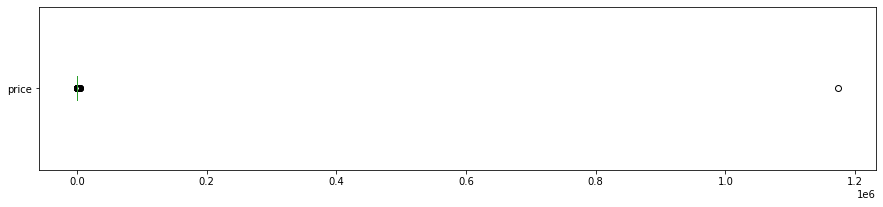

VALORES ACIMA DE 1000 EUROS
número de entradas: 74
quanto representa em percentual: 1.0606%


In [43]:
# price

df.price.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

# verificando a quantidade de valores acima de 1000 para price

print(f'VALORES ACIMA DE 1000 EUROS')
print(f'número de entradas: {len(df[df.price > 1000])}')
print(f'quanto representa em percentual: {(len(df[df.price > 1000]) / df.shape[0]) * 100 :.4f}%')

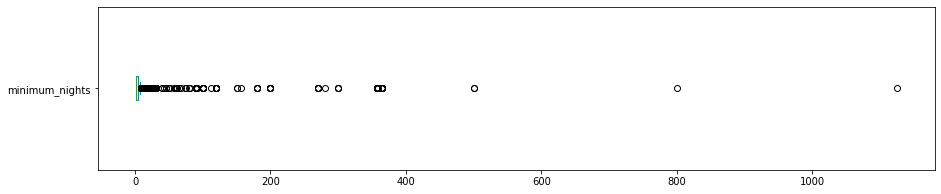

VALORES ACIMA DE 40 NOITES
número de entradas: 154
quanto representa em percentual: 2.2073%


In [44]:
# minimum_nights

df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

# verificando a quantidade de valores acima de 40 para minimum_nights

print(f'VALORES ACIMA DE 40 NOITES')
print(f'número de entradas: {len(df[df.minimum_nights > 40])}')
print(f'quanto representa em percentual: {(len(df[df.minimum_nights > 40]) / df.shape[0]) * 100 :.4f}%')

**Como identificamos outliers nas variáveis analisadas acima, iremos fazer a limpeza desses dados e plotar novos histogramas**

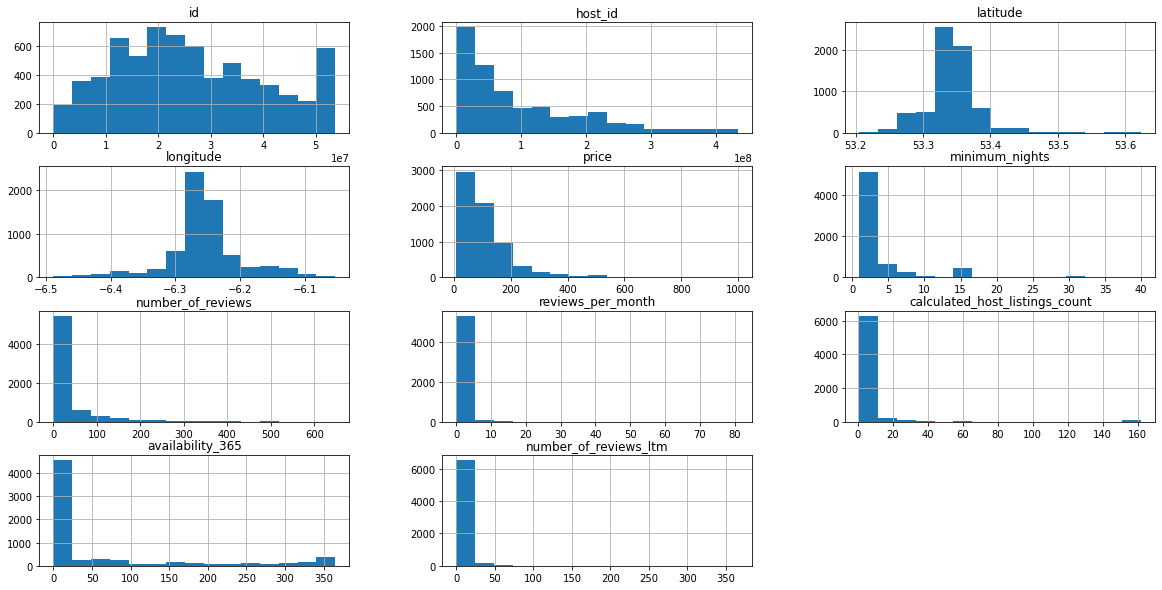

In [45]:
# removendo os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis = 0, inplace = True)

# removendo as variáveis 'license' e 'neighbourhood_group', pois elas estão vazias

df_clean.drop(['license', 'neighbourhood_group'], axis = 1, inplace = True)

# plotando os novos histogramas para as variáveis numéricas

df_clean.hist(bins = 15, figsize = (20, 10));

### **Q4. Qual a média dos preços de aluguel?**

A média dos preços de aluguel por noite, que antes era de aproximadamente 300 Euros, passou a ser de 116.83 Euros após a limpeza dos outliers dessa variável.

In [46]:
# verificando a média da coluna 'price'

print(f'A nova média de preços de aluguel é de {df_clean.price.mean() :.2f} Euros por noite.')

A nova média de preços de aluguel é de 116.83 Euros por noite.


### **Q5. Qual a correlação existente entre as variáveis**

Correlação representa a relação entre duas coisas. Nesse caso, queremos analisar as relações entre as variáveis.

Teremos um coeficiente de correlação que vai estabelecer qual a intensidade entre essas relações das variáveis, sendo que quanto mais próximo de 1.0, mais intensa é a correlação positiva (se uma cresce, a outra cresce na mesma proporção), e quanto mais próximo de de -1, mais intensa é a correlação negativa (se uma cresce, a outra decresce na mesma proporção).

As correlações entre as variáveis que nos interessam mais a serem analisadas, podem ser demonstradas de duas maneiras:
* Uma matriz de correlação;
* Um heatmap, através dessa matriz, utilizando o `seaborn`.

In [47]:
# criando uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.067046,-0.038150,-0.029041,-0.059834,0.104654
minimum_nights,0.067046,1.000000,-0.025552,-0.040201,-0.007413,0.081253
number_of_reviews,-0.038150,-0.025552,1.000000,0.531319,-0.063659,0.123820
reviews_per_month,-0.029041,-0.040201,0.531319,1.000000,0.073369,0.204454
calculated_host_listings_count,-0.059834,-0.007413,-0.063659,0.073369,1.000000,0.383358
availability_365,0.104654,0.081253,0.123820,0.204454,0.383358,1.000000


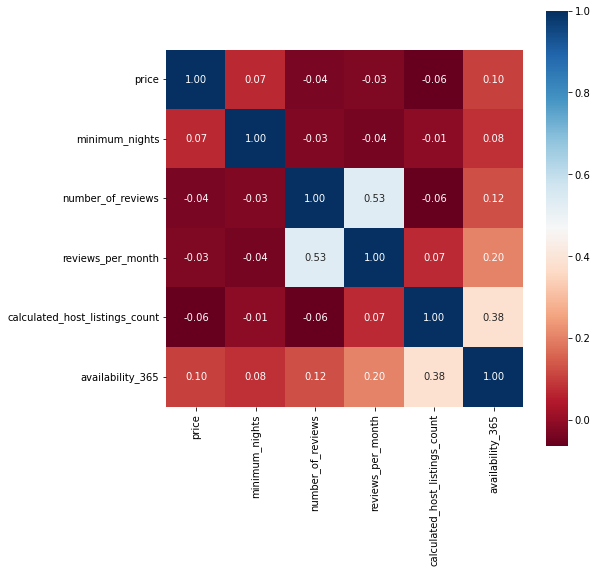

In [48]:
# plot de um heatmap a partir das correlações

fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr, cmap = 'RdBu', annot = True, fmt = '.2f', square = True, ax = ax);

É possível identificar as seguintes correlações:
* **Correlação negativa entre preço e número de propriedades do anfitrião** - com uma quantidade de imóveis maior, é possível regular melhor os preços das hospedagens, exatamente por não depender de apenas uma renda;
* **Correlação negativa entre preço e número de classificações do imóvel** - quando procuramos um local para hospedagem, queremos saber o que as pessoas que já estiveram lá vivenciaram, para ter uma maior segurança de que é aquilo que estamos buscando. Quando os locais ainda não possuem muitas classificações, precisam gerar interesse nas pessoas através de um preço mais acessível;
* **Correlação negativa entre preço e número mínimo de noites** - imóveis com um número maior de noites mínimas de estadia, costumam ter preços menores por noite, visto que o proprietário terá um melhor custo/benefício ao hospedar as pessoas por mais tempo na sua propriedade, diminuindo o risco de vacância.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

É interessante verificar que na Irlanda, casas/apartamentos inteiros e quartos privados praticamente dividem a liderança de aluguéis pelo Airbnb. Os imóveis inteiros ainda são os mais alugados segundo o dataset, com menos de 1% de diferença para o segundo lugar.

In [49]:
# quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    3293
Private room       3270
Shared room         134
Hotel room           53
Name: room_type, dtype: int64

In [50]:
# porcentagem de cada tipo de imóvel disponível

(df_clean.room_type.value_counts() / df_clean.room_type.shape[0]) * 100

Entire home/apt    48.785185
Private room       48.444444
Shared room         1.985185
Hotel room          0.785185
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Dublin segundo o dataset?**

A região mais cara para se alugar um imóvel em Dublin pelo Airbnb, segundo o dataset, é Dublin City. Agora precisamos de outros dados e informações gerais que nos confirmem isso.

Primeiramente, por terem apenas 4 localidades registradas nesse dataset, eu resolvi analisar quantos imóveis estavam registrados por região, para saber se nenhuma média de preço poderia estar passando uma informação não condizente com a realidade. 

Dublin City é o local no qual a grande maioria dos imóveis estão localizados, tornando o ponto mais procurado, aumentando o preço. Nenhuma das regiões têm menos de 200 imóveis listados, isso significa que é muito difícil que alguma variação possa afetar na média dos valores locais.

Através de uma pesquisa mais aprofundada, descobri que a Irlanda é dividida em 4 províncias, as quais são subdivididas em diversos condados (para saber mais sobre o assunto, você pode clicar no seguinte [link](https://pt.wikipedia.org/wiki/Subdivis%C3%B5es_da_Irlanda#Condados)). As regiões descritas no nosso dataset são todas condados, que tiveram sua divisão de Dublin em 1994 por fins administrativos, sendo assim, podemos considerar Dublin City como o centro do condado de Dublin, o que também confirma a maior oferta e preços mais elevados dos imóveis.

In [51]:
# verificando preços por condados, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)

neighbourhood
Dublin City              120.379606
Dn Laoghaire-Rathdown    114.284741
Fingal                   106.589404
South Dublin              81.014134
Name: price, dtype: float64

In [52]:
# verificando quantos imóveis estão lsitados em cada condado

print(f'Número de imóveis registrados em Dublin City: {df_clean[df_clean.neighbourhood == "Dublin City"].shape[0]}')
print(f'Número de imóveis registrados em Dn Laoghaire-Rathdown: {df_clean[df_clean.neighbourhood == "Dn Laoghaire-Rathdown"].shape[0]}')
print(f'Número de imóveis registrados em Fingal: {df_clean[df_clean.neighbourhood == "Fingal"].shape[0]}')
print(f'Número de imóveis registrados em South Dublin: {df_clean[df_clean.neighbourhood == "South Dublin"].shape[0]}')

Número de imóveis registrados em Dublin City: 5129
Número de imóveis registrados em Dn Laoghaire-Rathdown: 734
Número de imóveis registrados em Fingal: 604
Número de imóveis registrados em South Dublin: 283


**Como temos os dados da latitude e longitude de cada imóvel, podemos plotar um gráfico que mostra pontos representando a localização exata de cada um, que serão classificados por cores segundo a faixa de preço na qual estiverem**

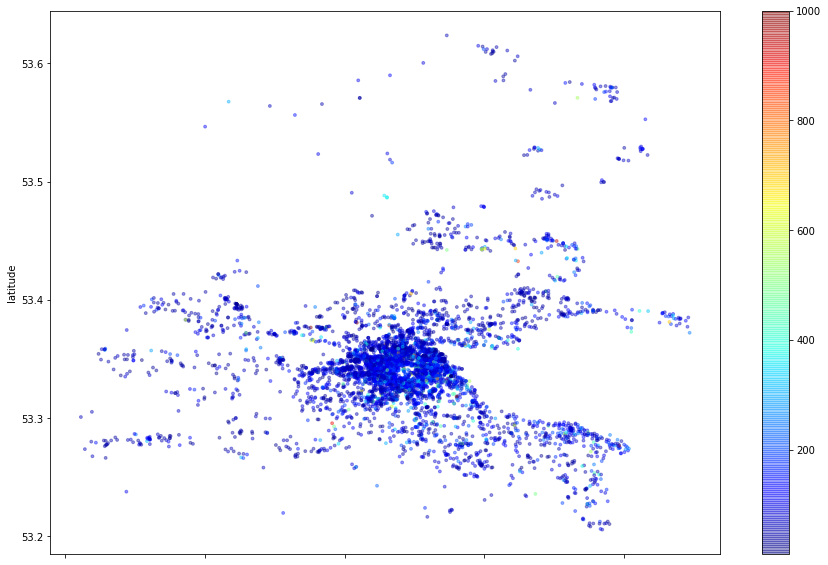

In [53]:
# scatterplot dos imóveis pela latitude-longitude, usando cores para as faixas de preço

df_clean.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, c = df_clean.price, s = 8, cmap = plt.get_cmap('jet'), figsize = (15, 10));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Temos uma média geral de aproximadamente 4 noites mínimas para aluguel, nos levando a crer que os anfitriões dão preferência para pessoas que irão passar aproximadamente uma semana na localidade, ou pelo menos 3 noites de um final de semana.

In [54]:
# verificando a média da coluna 'minimum_nights'

print(f'Média do mínimo de noites para aluguel: {df_clean.minimum_nights.mean()}')
print(f'Média do mínimo de noites para aluguel por condado:\n{df_clean.groupby(["neighbourhood"]).minimum_nights.mean()}')

Média do mínimo de noites para aluguel: 3.7493333333333334
Média do mínimo de noites para aluguel por condado:
neighbourhood
Dn Laoghaire-Rathdown    4.061308
Dublin City              3.864886
Fingal                   2.670530
South Dublin             3.148410
Name: minimum_nights, dtype: float64


## Conclusões


Realizei uma análise na base de dados disponibilizada pelo Airbnb, com foco na cidade de Dublin, na Irlanda. Apesar do dataset utilizado ser uma versão resumida, consegui tirar diversos insights analisados ao longo do notebook.

No início foram detectados alguns outliers, principalmente quando se tratava de preço da diária e o número mínimo de noites, com valores exorbitantes que não faziam muito sentido para a análise, e até distorciam a média e a distribuição dos dados. Além disso, foram identificadas duas colunas que estavam com 100% dos seus dados nulos, então foi feita uma pequena limpeza no dataset para obter resultados mais condizentes com a realidade.

Foram identificadas também algumas relações entre as variáveis, principalmente entre preço, localização e número mínimo de noites. Utilizei então de uma análise exploratória um pouco mais aprofundada para confirmar se as conclusões com aqueles dados fazia sentido. 

Por Dublin ser a capital da Irlanda, e ponto turístico para os amantes da vida noturna, com um cardápio completo de bares localizados no centro da cidade, é normal que a maioria dos imóveis estejam concentrados nessa região, o que eleva o preço das estadias e aumenta o número mínimo de noites para aluguel (por ser extremamente concorrido). Segundo o site [Statista](https://www.statista.com/statistics/660138/number-of-overseas-visits-to-ireland-by-region/#:~:text=Dublin%20recorded%20the%20highest%20number,around%202.36%20million%20visits%20overall.), no ano de 2019, antes da pandemia do COVID-19, Dublin recebeu mais de 6 milhões de turistas estrangeiros. Para finalidades de comparação, segundo um [documento](https://newsroom.mastercard.com/wp-content/uploads/2019/09/GDCI-Global-Report-FINAL-1.pdf) disponibilizado pela própria Mastercard, nesse mesmo ano, Nova York (que é um dos destinos mais procurados pelos turistas do mundo inteiro) teve um total de 13 milhões de turistas estrangeiros.

Finalizando a análise, é interessante perceber a força que a empresa Airbnb possui no ramo de hospedagens, principalmente ao perceber a quantidade de capital que gira em torno dos aluguéis nos pontos mais procurados do mundo, além de confirmar a grande oportunidade que existe nessa área de investimentos de imóveis, ao trazer esse tipo de análise para qualquer outra cidade.